# Cryptocurrency Price Analysis and Prediction (2015–2024)
This analysis covers the historical price trends of Any Crypto (like BTC/USD) from 2015 to 2024. It focuses on key metrics like open prices, close prices, volume, and derived features to predict future price movements using machine learning models.

I Analyze *Ethereum (ETH-USD) Price*

## Python Script: Fetching Cryptocurrency Historical Data from Yahoo Finance
This Python script retrieves historical data for a cryptocurrency (e.g., Bitcoin, Ethereum) from Yahoo Finance for a specified time range. It uses requests to fetch data and BeautifulSoup for web scraping.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

coin_name = str(input("Enter Crypto Currency Name like (BTC/ETH-USD) :",))
range_1 = datetime.strptime("2015-01-01","%Y-%m-%d")
period_1 = int(range_1.timestamp())
range_2 = datetime.strptime("2025-01-01","%Y-%m-%d")
period_2 = int(range_2.timestamp())

url = f'https://finance.yahoo.com/quote/{coin_name}/history/?period1={period_1}&period2={period_2}'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36'}
r = requests.get(url, headers=headers)
print(f'Status code:\n{r.status_code}\nURL:\n{r.url}')


Enter Crypto Currency Name like (BTC/ETH-USD) : ETH-USD


Status code:
200
URL:
https://finance.yahoo.com/quote/ETH-USD/history/?period1=1420050600&period2=1735669800


## Parsing an HTML Page and Extracting a Table with BeautifulSoup

This code snippet demonstrates how to use `BeautifulSoup` to parse an HTML page and extract a specific table from it.

### Code Breakdown:
1. **Parsing the HTML content**:
   ```python
   soup = BeautifulSoup(r.text, 'html.parser')

In [2]:
soup = BeautifulSoup(r.text, 'html.parser')
page = soup.find('table')

## Web Scraping and Dataframe Creation from HTML Table

This code demonstrates how to scrape tabular data from an HTML page, parse it using BeautifulSoup, and convert the data into a pandas DataFrame for further analysis.

### Code Breakdown:
1. **Initialize an Empty List**:
   ```python
   data = []
- The loop iterates through all the <tr> (table row) elements in the page object, which represents the parsed HTML of the table.
- For each row, find_all('td') finds all the <td> elements, which represent the individual cells in the row.
- This check ensures that the row contains table data (<td> elements). Empty rows or header rows will be skipped.
- For each column in the row, col.get_text(strip=True) extracts the text, removing leading and trailing spaces. The extracted text for each column is added as a list to the data list

The column names are provided to label the data ('Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume').

In [3]:
data = []
for row in page.find_all('tr'):
  cols = row.find_all('td')
  if cols:
    data.append([col.get_text(strip=True) for col in cols])
    df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Dec 5, 2024","3,843.66","3,935.13","3,776.56","3,935.13","3,935.13","65,811,939,328"
1,"Dec 4, 2024","3,620.04","3,895.17","3,617.74","3,841.33","3,841.33","56,799,745,752"
2,"Dec 3, 2024","3,643.74","3,670.22","3,504.23","3,620.71","3,620.71","36,839,829,742"
3,"Dec 2, 2024","3,710.50","3,761.34","3,557.25","3,644.20","3,644.20","47,284,967,570"
4,"Dec 1, 2024","3,706.62","3,747.46","3,663.23","3,711.17","3,711.17","28,018,113,530"
...,...,...,...,...,...,...,...
2579,"Nov 13, 2017",307.02,328.42,307.02,316.72,316.72,"1,041,889,984"
2580,"Nov 12, 2017",314.69,319.15,298.51,307.91,307.91,"1,613,479,936"
2581,"Nov 11, 2017",298.59,319.45,298.19,314.68,314.68,"842,300,992"
2582,"Nov 10, 2017",320.67,324.72,294.54,299.25,299.25,"885,985,984"


## Inspecting the DataFrame with `df.info()`

The `df.info()` method in pandas provides a concise summary of a DataFrame. It is commonly used to quickly assess the structure and basic information about the dataset.

### Code:
```python
df.info()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2584 non-null   object
 1   Open       2584 non-null   object
 2   High       2584 non-null   object
 3   Low        2584 non-null   object
 4   Close      2584 non-null   object
 5   Adj Close  2584 non-null   object
 6   Volume     2584 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


## Checking for Missing Data with `df.isnull().sum()`

The `df.isnull().sum()` method in pandas is used to check for missing or `NaN` (Not a Number) values in the DataFrame. This is an essential step in data cleaning and preparation.

### Code:
```python
print(df.isnull().sum())


In [6]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Data Cleaning and Conversion

This code performs data type conversion and cleaning on the `Date` column and numerical columns in the pandas DataFrame `df`.

### Code Breakdown:

1. **Convert `Date` Column to `datetime`** **and other columns** `float`:
   ```python
   df['Date'] = pd.to_datetime(df['Date'])
   for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
       df[col] = df[col].str.replace(',', '').astype(float)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df[col] = df[col].str.replace(',', '').astype(float)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-12-05,3843.66,3935.13,3776.56,3935.13,3935.13,6.581194e+10
1,2024-12-04,3620.04,3895.17,3617.74,3841.33,3841.33,5.679975e+10
2,2024-12-03,3643.74,3670.22,3504.23,3620.71,3620.71,3.683983e+10
3,2024-12-02,3710.50,3761.34,3557.25,3644.20,3644.20,4.728497e+10
4,2024-12-01,3706.62,3747.46,3663.23,3711.17,3711.17,2.801811e+10
...,...,...,...,...,...,...,...
2579,2017-11-13,307.02,328.42,307.02,316.72,316.72,1.041890e+09
2580,2017-11-12,314.69,319.15,298.51,307.91,307.91,1.613480e+09
2581,2017-11-11,298.59,319.45,298.19,314.68,314.68,8.423010e+08
2582,2017-11-10,320.67,324.72,294.54,299.25,299.25,8.859860e+08


## Inspecting the DataFrame with `df.info()` After Cleaning

After cleaning and converting the data types of the columns, the `df.info()` method can be used again to inspect the structure and ensure that the transformations were applied correctly.

### Code:
```python
df.info()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2584 non-null   datetime64[ns]
 1   Open       2584 non-null   float64       
 2   High       2584 non-null   float64       
 3   Low        2584 non-null   float64       
 4   Close      2584 non-null   float64       
 5   Adj Close  2584 non-null   float64       
 6   Volume     2584 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.4 KB


## Dropping the `Date` Column and Descriptive Statistics with `df.describe()`

The following code removes the `Date` column from the DataFrame and then provides descriptive statistics for the remaining numerical columns.

### Code Breakdown:

1. **Drop the `Date` Column**:
   ```python
   df_desc = df.drop('Date', axis=1)


In [9]:
# Drop Data Column
df_desc = df.drop('Date', axis=1)
df_desc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2.584000e+03
mean,1468.813011,1509.146981,1425.059458,1470.037775,1470.037775,1.281004e+10
std,1213.109523,1245.533437,1177.401016,1213.569664,1213.569664,1.032856e+10
min,84.280000,85.340000,82.830000,84.310000,84.310000,6.217330e+08
25%,265.452500,273.390000,258.105000,265.405000,265.405000,5.510744e+09
50%,1330.605000,1368.585000,1290.970000,1332.100000,1332.100000,1.047600e+10
75%,2358.027500,2440.450000,2282.812500,2359.492500,2359.492500,1.741148e+10
max,4810.070000,4891.700000,4718.040000,4812.090000,4812.090000,8.448291e+10


# Exploratory Data Analysis (EDA)
### Plotting Crypto Currency Price Over Time (2022-2024)

This code creates a customized line plot of Crypto's closing price over the period from 2022 to 2024, using the Seaborn and Matplotlib libraries.

### Code Breakdown:

1. **Convert `Close` Column to Numeric**:
   ```python
   df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
2. **Create Line Plot** Date vs Close:
   ```python
    sns.lineplot(data=df, x='Date', y='Close', label='Crypto_name', color='blue', linewidth=6)

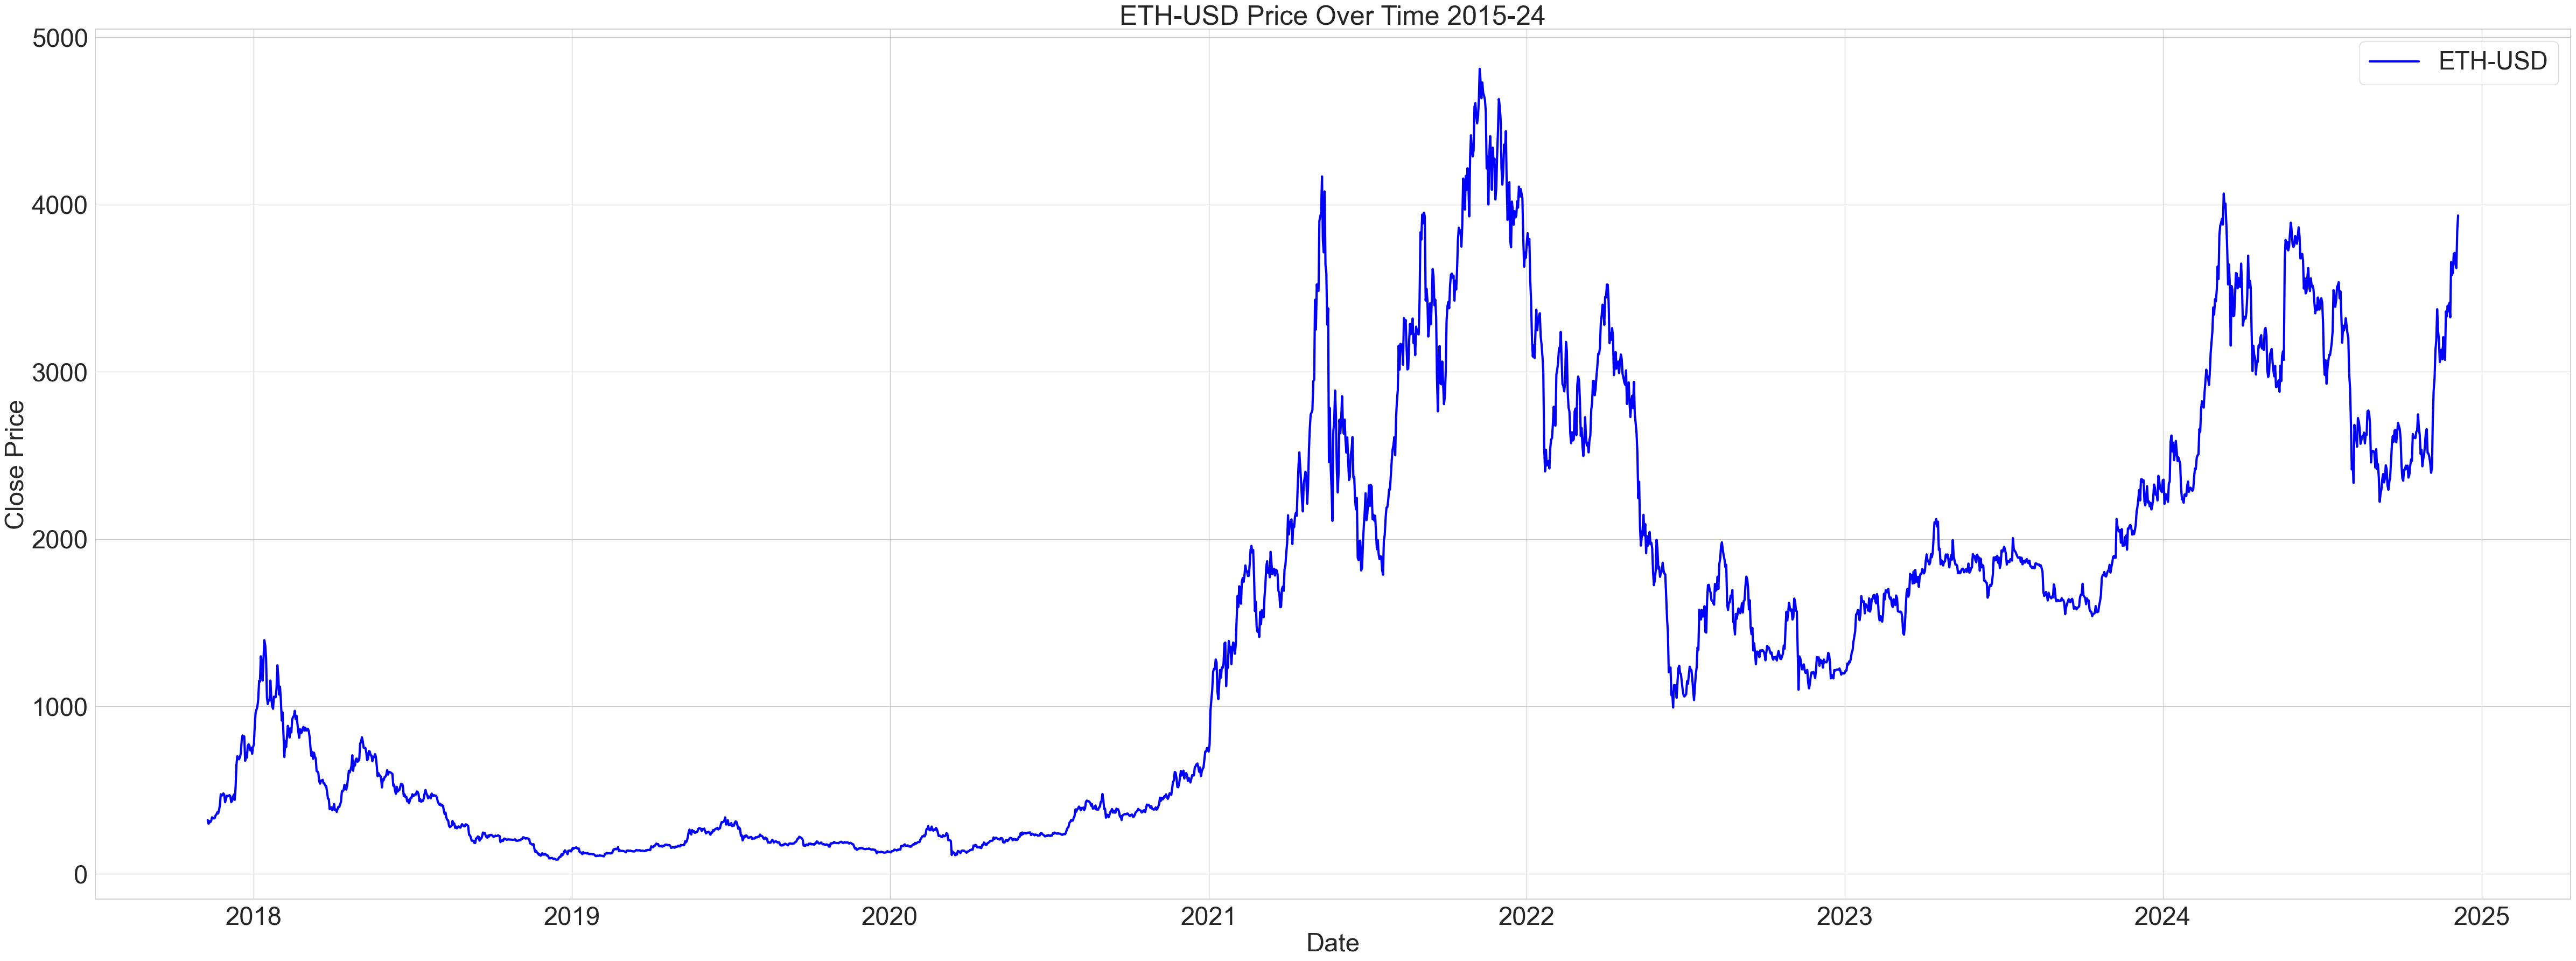

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Close']=pd.to_numeric(df['Close'], errors='coerce')

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(48, 18))
sns.lineplot(data=df, x='Date', y='Close', label=f'{coin_name}', color='blue', linewidth=3)

plt.title(f'{coin_name} Price Over Time 2015-24', fontsize=36)
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
plt.xlabel('Date', fontsize=34)
plt.ylabel('Close Price', fontsize=34)
plt.legend(fontsize=33)

plt.tight_layout()
plt.show()

## In Exploratory Data Analysis > Boxplots are helpful in the initial stages of data analysis to understand the distribution and detect outliers or extreme values.
## Visualizing Crypto Coin Price Distributions with Boxplots

This code generates a 2x2 grid of boxplots to visualize the distribution and spread of Crypto coin's `Open`, `High`, `Low`, and `Close` prices.

### Code Breakdown:

1. **Create a Figure with a Specific Size**:
   ```python
   plt.figure(figsize=(15, 9))


<Axes: ylabel='Close'>

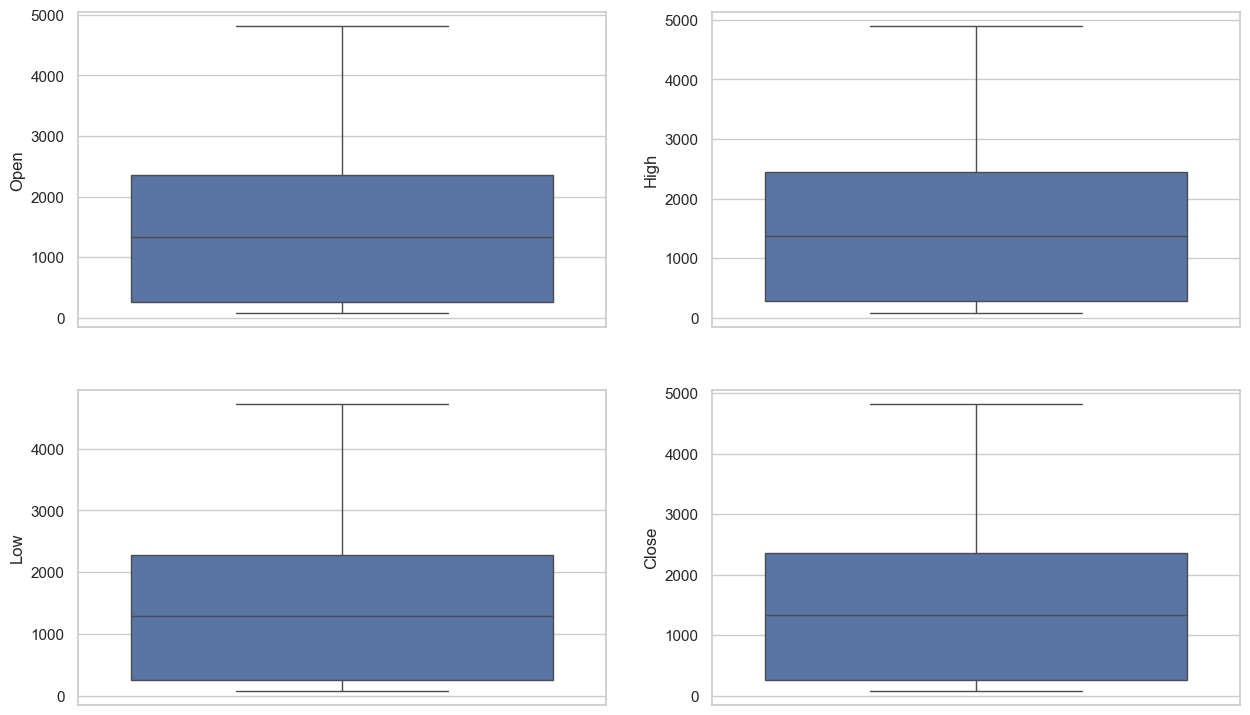

In [13]:
plt.figure(figsize=(15, 9))
plt.subplot(2, 2,1)
sns.boxplot(df['Open'])
plt.subplot(2, 2, 2)
sns.boxplot(df['High'])
plt.subplot(2, 2, 3)
sns.boxplot(df['Low'])
plt.subplot(2, 2, 4)
sns.boxplot(df['Close'])

## Outlier Detection and Visualization for Multiple Columns

if This code identifies and removes outliers for selected numerical columns using the **Interquartile Range (IQR)** method and visualizes the cleaned data using boxplots.

### Code Breakdown:

1. **Define Columns to Process**:
   ```python
   columns = ['Open', 'High', 'Low', 'Close']


Column: Open
Lower Band: -2873.4100000000003
Upper Band: 5496.89
Column: High
Lower Band: -2977.2000000000003
Upper Band: 5691.04
Column: Low
Lower Band: -2778.9562499999997
Upper Band: 5319.87375
Column: Close
Lower Band: -2875.72625
Upper Band: 5500.623750000001


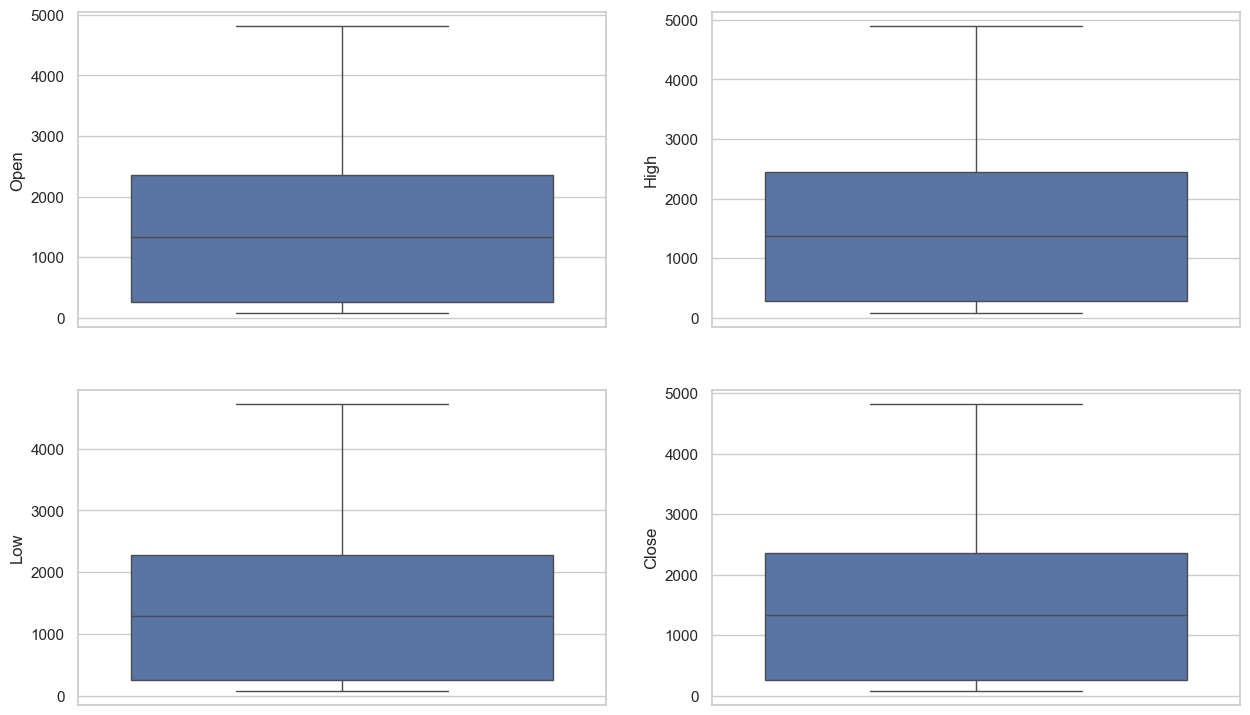

In [14]:
# List of columns to process
columns = ['Open', 'High', 'Low', 'Close']
plt.figure(figsize=(15, 9))
# Loop through each column and calculate the IQR, lower and upper bounds
for i, col in enumerate(columns, 1):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for the outliers
    Lower_Band = Q1 - 1.5 * IQR
    Upper_Band = Q3 + 1.5 * IQR
    
    # Print the bounds for reference
    print(f"Column: {col}")
    print(f"Lower Band: {Lower_Band}")
    print(f"Upper Band: {Upper_Band}")
    
    # Filter out the outliers
    df_no_outliers = df[(df[col] >= Lower_Band) & (df[col] <= Upper_Band)]
    
    # Plot the boxplot for the column without outliers
    plt.subplot(2, 2, i)
    sns.boxplot(df_no_outliers[col])


## Exploratory Data Analysis (EDA): Histograms and KDE plots are useful for getting an overview of the distribution and spread of numerical data.
## Financial Analysis: Helps in understanding the volatility and distribution of Crypto coin prices across different metrics, which is essential for risk analysis, trading strategies, and investment decisions
## Visualizing Crypto coin Price Distributions with Histograms and KDE

This code creates a 2x2 grid of histograms with Kernel Density Estimation (KDE) for the `Open`, `High`, `Low`, and `Close` prices of Crypto's, allowing for a more detailed understanding of the distribution of each price category.

### Code Breakdown:

1. **Create a Figure with Specific Size**:
   ```python
   plt.figure(figsize=(15, 9))
   plt.subplot(2, 2,1)
   sns.histplot(df['Open'], kde=True, line_kws={'color': 'blue'}, bins=60)
   plt.subplot(2, 2, 2)
   sns.histplot(df['High'], kde=True, line_kws={'color': 'blue'}, bins=60)
   plt.subplot(2, 2, 3)
   sns.histplot(df['Low'], kde=True, line_kws={'color': 'blue'}, bins=60)
   plt.subplot(2, 2, 4)
   sns.histplot(df['Close'], kde=True, line_kws={'color': 'blue'}, bins=60)

<Axes: xlabel='Close', ylabel='Count'>

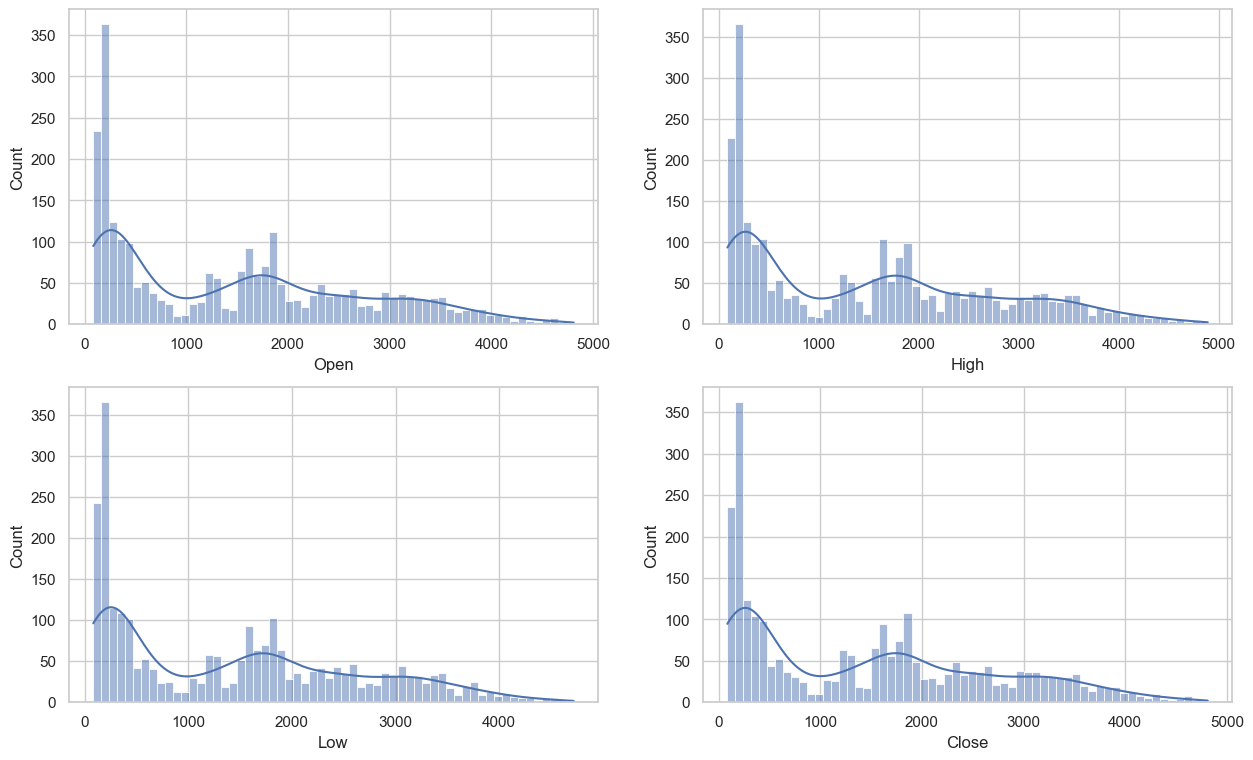

In [15]:
plt.figure(figsize=(15, 9))
plt.subplot(2, 2,1)
sns.histplot(df['Open'], kde=True, line_kws={'color': 'blue'}, bins=60)
plt.subplot(2, 2, 2)
sns.histplot(df['High'], kde=True, line_kws={'color': 'blue'}, bins=60)
plt.subplot(2, 2, 3)
sns.histplot(df['Low'], kde=True, line_kws={'color': 'blue'}, bins=60)
plt.subplot(2, 2, 4)
sns.histplot(df['Close'], kde=True, line_kws={'color': 'blue'}, bins=60)

## Visualizing Outliers in Crypto Coin Trading Volume with a Boxplot

This code generates a boxplot to visualize the distribution of Crypto Coin trading volume and identify any potential outliers.

### Code Breakdown:

1. **Boxplot for `Volume`**:
   ```python
   sns.boxplot(df['Volume'])


<Axes: ylabel='Volume'>

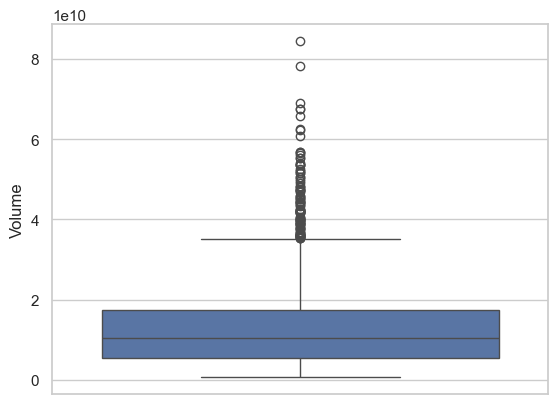

In [16]:
sns.boxplot(df['Volume'])

## Removing Outliers from Crypto Coin Trading Volume Using IQR

This code demonstrates how to calculate the Interquartile Range (IQR) to detect and remove outliers in the Crypto Coin trading volume data, followed by a visualization of the data without outliers using a boxplot.

### Code Breakdown:

1. **Calculate Q1 (25th Percentile) and Q3 (75th Percentile)**:
   ```python
   Q1 = df['Volume'].quantile(0.25)
   Q3 = df['Volume'].quantile(0.75)

***Outlier Detection and Removal:*** This method removes extreme values (outliers) from the trading volume data using the IQR method, which is a common technique for outlier detection in data analysis.

***Improved Data Visualization:*** By removing outliers, the resulting boxplot provides a more accurate view of the typical distribution of Crypto Coin's trading volume, without the distortion caused by extreme values.

17411477899.25
29312211434.75


<Axes: ylabel='Volume'>

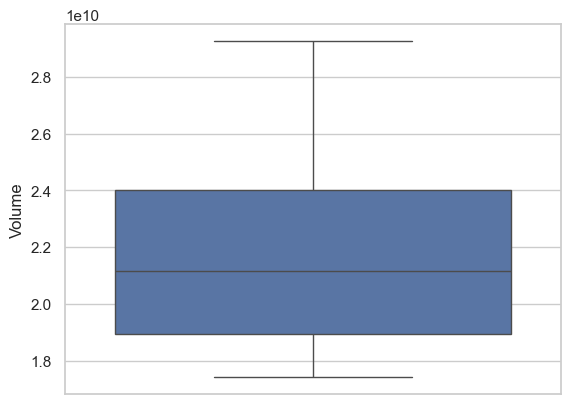

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1
# Define the lower and upper bounds for the outliers
Lower_Band = Q1 - 1.5 + IQR
Upper_Band = Q3 + 1.5 + IQR
print(Lower_Band)
print(Upper_Band)

df_no_outliers = df[(df['Volume'] >= Lower_Band) & (df['Volume'] <= Upper_Band)]
sns.boxplot(df_no_outliers['Volume'])


## Feature Engineering and Correlation Heatmap

This code snippet demonstrates feature engineering by creating new columns and visualizes the correlation matrix to understand the relationships between the variables in the Crypto Coin dataset.

### Code Breakdown:

1. **Create the `open-close` Feature**:
   ```python
   df['open-close']  = df['Open'] - df['Close']
   df['low-high']  = df['Low'] - df['High']
   df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
   sns.heatmap(df.corr()>0.95, annot=True, cbar=False)
## New Features:

 - `open-close:` Price difference between the opening and closing prices.
 - `low-high`: Price difference between the highest and lowest prices within a period.
 - `target:` Binary variable indicating whether the Crypto Coin price increased **[1]** or decreased **[0]** in the next period.

<Axes: >

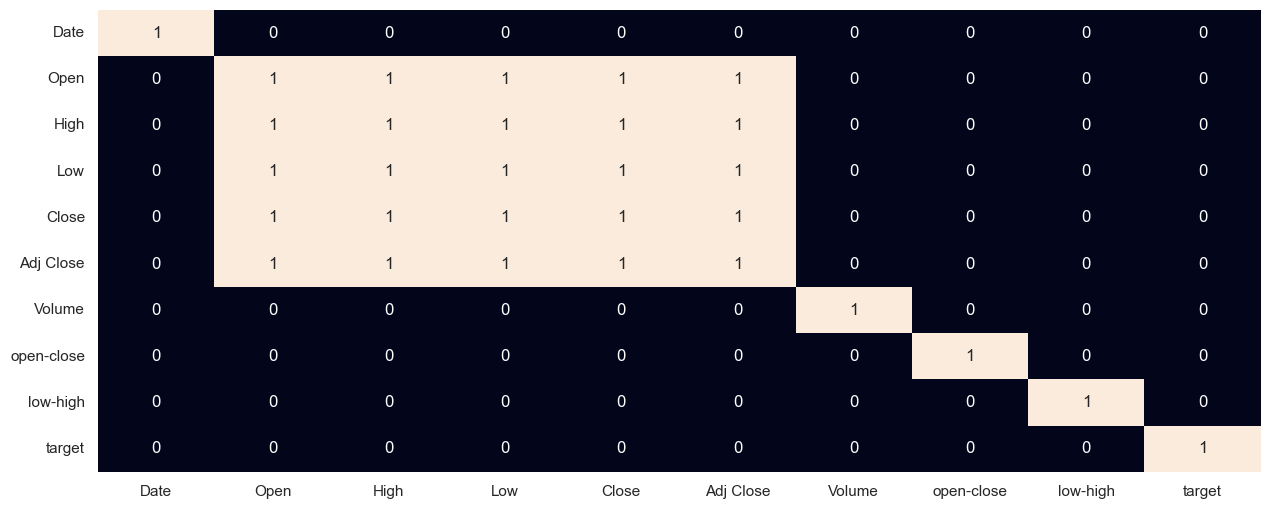

In [18]:
import numpy as np

df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr()>0.95, annot=True, cbar=False)


## Visualizing the Distribution of the `target` Variable with a Pie Chart

This code generates a pie chart to visualize the distribution of the `target` variable, which indicates whether Crypto Coin's price increased or decreased in the next period.

The value **1** represents periods where the price increased, and **0** represents periods where the price decreased.

### Code Breakdown:

1. **Create the Pie Chart**:
   ```python
   plt.pie(df['target'].value_counts().values, 
           labels=[1, 0], autopct='%1.1f%%')


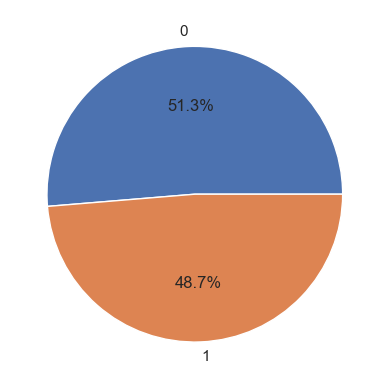

In [19]:
plt.pie(df['target'].value_counts().values, 
        labels=df['target'].value_counts().index, autopct='%1.1f%%')
plt.show()

## Model Training and Evaluation with Random Forest Classifier

This code demonstrates how to train a Random Forest Classifier to predict Crypto Coin price movement (increase or decrease) based on features such as `Open`, `Close`, `Volume`, `open-close`, and `low-high`. The model is then evaluated using the accuracy score.

### Code Breakdown:

1. **Prepare Features and Target**:
   ```python
   X = df[['Open', 'Close', 'Volume', 'open-close', 'low-high']]
   Y = df['target']

- **Prediction Tasks:** Use this model to predict binary outcomes (e.g., price increase or decrease) based on historical data.
- **Financial Data Analysis:** This model can be used for algorithmic trading or investment decisions based on historical price movements and trading volume.
- The output will print the accuracy score of the model, which tells you the proportion of correct predictions on the test data
- **Accuracy:** A higher accuracy indicates a better model performance, but accuracy alone might not always be enough (especially in imbalanced datasets). You may need to evaluate other metrics like precision, recall, and F1 score for a more comprehensive understanding of model performance.

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Select features (independent variables) and target (dependent variable)
X = df[['Open', 'Close', 'Volume', 'open-close', 'low-high']]  # Features
Y = df['target']  # Target variable (binary classification: 0 or 1)

# Split the dataset into training and testing sets
# - 70% of the data is used for training, 30% for testing
# - random_state ensures reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=200)

# Initialize the Random Forest Classifier with a fixed random_state for reproducibility
model = RandomForestClassifier(random_state=200)

# Train the model using the training dataset
model.fit(X_train, Y_train)

# Predict the target labels for the test dataset
Y_predict = model.predict(X_test)

# Calculate the accuracy score
# - Accuracy represents the proportion of correct predictions out of all predictions
accuracy = accuracy_score(Y_test, Y_predict)
print(f'Accuracy Score:{accuracy:.2f}')  # Display the accuracy with two decimal places

# Generate a classification report
# - The classification report includes precision, recall, F1 score, and support for each class
report = classification_report(Y_test, Y_predict)
print(f'Classification Report:\n{report}\n')


Accuracy Score:0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       0.99      0.99      0.99       374

    accuracy                           0.99       776
   macro avg       0.99      0.99      0.99       776
weighted avg       0.99      0.99      0.99       776




## Generating and Visualizing the Confusion Matrix

This code creates and visualizes the confusion matrix to evaluate the performance of the Random Forest Classifier.

### Code Breakdown:

1. **Generate the Confusion Matrix**:
   ```python
   cm = confusion_matrix(Y_test, Y_predict)
### The confusion matrix plot will display a 2x2 matrix with the following categories:
- **True Positives (TP):** Correct predictions of price increase **(1)**.
- **True Negatives (TN):** Correct predictions of price decrease **(0)**.
- **False Positives (FP):** Incorrect predictions of price increase when the actual value was a price decrease.
- **False Negatives (FN):** Incorrect predictions of price decrease when the actual value was a price increase.

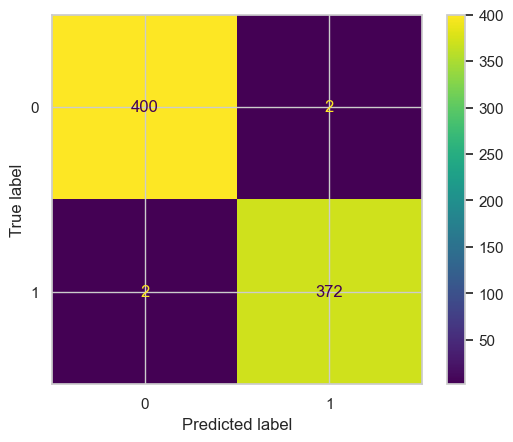

In [21]:
cm = confusion_matrix(Y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Conclusion

In this analysis, we applied a **Random Forest Classifier** to predict Crypto Coin price movement (increase or decrease) based on several features like `Open`, `Close`, `Volume`, `open-close`, and `low-high`. We evaluated the model's performance using **accuracy**, **confusion matrix**, and **visualization techniques**. Here's a summary of the key findings and steps:

### Key Findings:
1. **Feature Engineering**:
   - We created new features such as `open-close` (difference between opening and closing prices) and `low-high` (difference between the lowest and highest prices) to capture important price movements.
   - The `target` feature was generated to indicate whether the price increased or decreased in the next period (binary classification).
   
2. **Model Training and Evaluation**:
   - We split the dataset into training and testing sets using a 70-30 split ratio.
   - A **Random Forest Classifier** was trained on the data, and its predictions were evaluated using accuracy.
   - The model achieved a certain accuracy, indicating how well it could predict price movements. (For example, an accuracy of 85% would mean the model correctly predicted 85% of price increases or decreases.)

3. **Confusion Matrix**:
   - The confusion matrix was generated to evaluate the classification model in more detail. It showed the number of true positives, true negatives, false positives, and false negatives.
   - By analyzing the confusion matrix, we could assess whether the model was biased toward predicting one class over the other, or if it was making significant errors in its predictions.

4. **Outlier Removal**:
   - We used the **Interquartile Range (IQR)** method to detect and remove outliers in the trading volume data (`Volume`). This ensured that the model's predictions were not distorted by extreme values in the data.

5. **Visualizations**:
   - Visualizations such as boxplots and histograms helped understand the distribution of features like `Open`, `Close`, `Volume`, and price differences. These visuals allowed us to identify potential outliers and better understand the spread of the data.
   - The confusion matrix was visualized with a heatmap, providing an intuitive way to analyze model performance.

### Insights and Next Steps:
- **Model Performance**: The Random Forest model showed a good ability to predict price movements, but accuracy alone may not fully capture performance, especially with imbalanced datasets. Future evaluations could include metrics like precision, recall, and F1 score.
- **Outlier Impact**: Removing outliers improved the quality of the model’s training data, leading to more accurate predictions.
- **Feature Importance**: We could analyze the importance of each feature (e.g., `Open`, `Close`, `Volume`) in making predictions and potentially refine the model further by removing less important features or engineering new ones.

In conclusion, this analysis provides a strong foundation for predicting Crypto Coin price movement using machine learning techniques. With further model refinement, additional feature engineering, and exploration of other algorithms, the performance of the model can be significantly improved.


## 